# Exploratory Data Analysis

### Check if Data loads properly

In [1]:
import pandas as pd

In [2]:
scripts = pd.read_csv('data/processed_scripts.csv')
meta = pd.read_csv('data/metadata.csv')

In [3]:
scripts.head()

,Season,Episode,Title,Speaker,Dialog,S-E
0,4,10,The Girl From Poughkeepsie,Ross,hey,04-10
1,4,10,The Girl From Poughkeepsie,Ross,im sorry im late did i miss anything,04-10
2,4,10,The Girl From Poughkeepsie,Phoebe,joey stuffing 15 oreos in his mouth,04-10
3,4,10,The Girl From Poughkeepsie,Ross,15 your personal best,04-10
4,4,10,The Girl From Poughkeepsie,Phoebe,where were you,04-10


In [4]:
meta.head()

,S-E,Viewers,Stars
0,01-01,21.5,8.3
1,01-02,20.2,8.1
2,01-03,19.5,8.2
3,01-04,19.7,8.1
4,01-05,18.6,8.5


## Visualise metadata

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

### Overall Visualisation

Highest Viewed Episode  :  52.90 Million
Lowest  Viewed Episode  :  15.65 Million
Average Episode Views   :  25.03 Million
Standard Deviation      :  4.57 Million


<AxesSubplot:xlabel='S-E'>

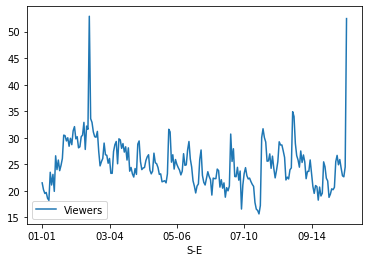

In [22]:
print(f"Highest Viewed Episode  : {max(meta.Viewers): .2f} Million")
print(f"Lowest  Viewed Episode  : {min(meta.Viewers): .2f} Million")
print(f"Average Episode Views   : {meta.Viewers.mean(): .2f} Million")
print(f"Standard Deviation      :  {meta.Viewers.std(): .2f} Million")

meta.plot('S-E', 'Viewers')

Highest Episode Rating :  9.70
Lowest  Episode Rating :  7.20
Average Episode Rating :  8.44
Standard Deviation     :  0.39


<AxesSubplot:xlabel='S-E'>

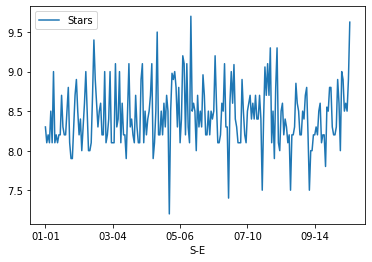

In [24]:
print(f"Highest Episode Rating : {max(meta.Stars): .2f}")
print(f"Lowest  Episode Rating : {min(meta.Stars): .2f}")
print(f"Average Episode Rating : {meta.Stars.mean(): .2f}")
print(f"Standard Deviation     : {meta.Stars.std(): .2f}")

meta.plot('S-E', 'Stars')

<AxesSubplot:xlabel='S-E'>

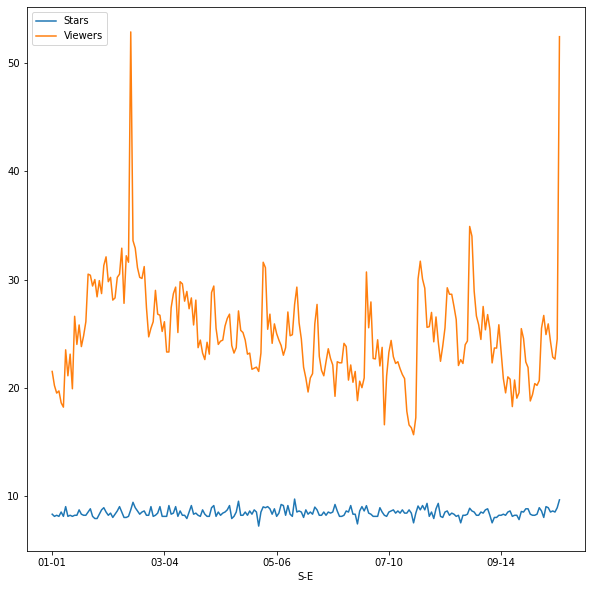

In [42]:
fig, ax = plt.subplots()

ax.plot(meta.Stars, color='red')
ax.tick_params(axis='y', labelcolor='red')

ax2 = ax.twinx()

ax.plot(meta.Stars, color='red')
ax.tick_params(axis='y', labelcolor='red')

### Season - Wise

In [36]:
# Extracting episode and season information for ease
meta['Season'] = meta['S-E'].str[:2].astype(int)
meta['Episode'] = meta['S-E'].str[3:].astype(int)
meta.head()

,S-E,Viewers,Stars,Season,Episode
0,01-01,21.5,8.3,1,1
1,01-02,20.2,8.1,1,2
2,01-03,19.5,8.2,1,3
3,01-04,19.7,8.1,1,4
4,01-05,18.6,8.5,1,5


In [37]:
seasons = meta.Season.unique()

#### Intra-Season Variations

1
2
3
4
5
6
7
8
9
10


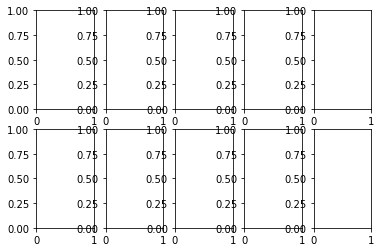

In [39]:
fig, axs = plt.subplots(2, 5)

# Viewers 
for i in range(2):
    for j in range(5):
        season = 5*i + (j+1)
        viewers = 